# Informe Template
-introduccion -> hipotesis

-materiales

-metodos/resultados -> experimentos

-conclusiones

-referencias

<div style="text-align: center">
 <h1><span style="color: red">TPE Fundamentos</span> </h1>
</div>

### Grupo numero 1

Integrantes:
- Dimuro, Agustin Nicolas
- Grillo, Agustin German
- Padilla, Tomas Agustin

---


<div style="text-align: center"> 
    <h2> Analisis descriptivo de las columnas </h2>
</div>

**Track:** el título de la canción.  
**Artist:** el intérprete o grupo que grabó la canción.  
**Duration:** la duración de la canción, medida en minutos y segundos.  
**Time_Signature:** la métrica musical de la canción, indica el número de pulsaciones por compás.  
**Danceability:** una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.  
**Energy:** una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.  
**Key:** la tonalidad musical en la que está compuesta la canción, representada por un número entero.  
**Loudness:** el volumen promedio de la canción, medido en decibelios (dB).  
**Mode:** la modalidad de la pista, indica si la canción está en tono mayor o menor.  
**Speechiness:** una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.  
**Acousticness:** una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.  
**Instrumentalness:** una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.  
**Liveness:** una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.  
**Valence:** Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.  
**Tempo:** la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).  
**Popularity:** una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.  
**Year:** el año en que se lanzó la canción.  

In [3]:
import pandas as pd

df = pd.read_csv("Covers.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Track             980 non-null    object 
 1   Artist            980 non-null    object 
 2   Duration          980 non-null    object 
 3   Time_Signature    980 non-null    int64  
 4   Danceability      980 non-null    float64
 5   Energy            980 non-null    float64
 6   Key               980 non-null    int64  
 7   Loudness          980 non-null    float64
 8   Mode              980 non-null    int64  
 9   Speechiness       980 non-null    float64
 10  Acousticness      980 non-null    float64
 11  Instrumentalness  980 non-null    float64
 12  Liveness          980 non-null    float64
 13  Valence           980 non-null    float64
 14  Tempo             980 non-null    float64
 15  Popularity        980 non-null    int64  
 16  Year              980 non-null    int64  
dt

---

<div style= "text-align: center">
    <h2> Generacion del primer Profile Report </h2>
</div>

In [4]:
import ydata_profiling as pp

report = pp.ProfileReport(df)
# report.to_notebook_iframe()
# report.to_file(output_file="covers.html")

---

<div style= "text-align: center">
    <h2> Analisis y preprocesamiento de cada variable</h2>
</div>

Como primer paso creamos una copia del dataset original, a la cual le vamos a aplicar todas las transformaciones necesarias de aqui en adelante con el objetivo de seguir manteniendo el original.

In [5]:
ds_copy=df.copy()

**Duration:** la duración de la canción, medida en minutos y segundos.  
A continuación, para facilitarnos el posible análisis a futuro de esta columna, decidimos pasar todos los valores de ella a segundos y representarlos en int.

In [6]:
import re

def convertir_a_segundos(duracion):
    minutos, segundos = duracion.split(":")
    return int(minutos) * 60 + int(segundos)

ds_copy["Duration"]=ds_copy["Duration"].apply(convertir_a_segundos)

**Time_Signature:** la métrica musical de la canción, indica el número de pulsaciones por compás.  
Valores unicos de la columna Time_signature  
A simple vista todos los valores parecen validos   
<span style="color: red;">Se repiten demasiado un unico valor </span>

In [7]:
df["Time_Signature"].value_counts()

Time_Signature
4    924
3     51
1      3
5      2
Name: count, dtype: int64

**Danceability:** una medida de qué tan adecuada es una pista para bailar, basada en el tempo, la estabilidad del ritmo, la fuerza del ritmo y la regularidad general.  
Valores unicos de la columna Danceability   
<span style="color: red;"> A simple vista todos los valores parecen validos </span> 

In [8]:
df["Danceability"].value_counts()

Danceability
0.637    9
0.680    7
0.665    7
0.649    6
0.639    6
        ..
0.792    1
0.798    1
0.717    1
0.759    1
0.452    1
Name: count, Length: 494, dtype: int64

**Energy:** una medida de intensidad y actividad en la canción, donde los valores más altos indican una pista más enérgica.  
Valores unicos de la columna Energy   
<span style= "color: red"> A simple vista todos los valores parecen validos </span>

In [9]:
df["Energy"].value_counts()

Energy
0.673    7
0.528    7
0.641    6
0.644    6
0.532    5
        ..
0.374    1
0.903    1
0.535    1
0.277    1
0.777    1
Name: count, Length: 543, dtype: int64

**Key:** la tonalidad musical en la que está compuesta la canción, representada por un número entero.  
Valores unicos de la columna Key

In [10]:
df["Key"].value_counts()

Key
0     140
7     121
9     116
2     101
5      95
4      81
1      74
11     65
10     64
8      52
6      46
3      25
Name: count, dtype: int64

**Loudness:** el volumen promedio de la canción, medido en decibelios (dB).  
Valores unicos de la columna Loudness  
Parece a simple vista no haber un falso nulo  
<span style="color: red;">Le eliminamos los numeros despues de la coma ya que asi se suele mostrar en todas las paginas web que hemos visto</span>  

In [11]:
df["Loudness"].value_counts()

Loudness
-12.472    3
-4.653     2
-12.264    2
-7.246     2
-12.923    2
          ..
-9.885     1
-9.283     1
-9.711     1
-11.367    1
-8.339     1
Name: count, Length: 916, dtype: int64

In [12]:
ds_copy["Loudness"] = ds_copy["Loudness"].astype(int)
ds_copy["Loudness"].value_counts()

Loudness
-9     114
-7      98
-8      98
-6      93
-10     92
-12     84
-11     73
-13     69
-5      64
-4      53
-14     48
-15     28
-3      18
-16     14
-17      9
-19      6
-2       5
-18      3
-20      3
-21      2
-27      2
-31      1
-30      1
-26      1
-23      1
Name: count, dtype: int64

**Mode:** la modalidad de la pista, indica si la canción está en tono mayor o menor.  
Valores unicos de la columna Mode  
<span style= "color: red">No tiene valores extraños </span>

In [13]:
df["Mode"].value_counts()

Mode
1    745
0    235
Name: count, dtype: int64

**Speechiness:** una medida de la presencia de palabras habladas en una pista, valores más altos indican cualidades más parecidas al habla.  
Valores unicos de la columna Speechiness   
<span style= "color: red">No parece haber valores nulos en un principio </span>

In [14]:
df["Speechiness"].value_counts()

Speechiness
0.0336    9
0.0346    9
0.0341    8
0.0283    8
0.0287    8
         ..
0.0455    1
0.0281    1
0.0390    1
0.0460    1
0.0531    1
Name: count, Length: 455, dtype: int64

**Acousticness:** una medida de la calidad acústica de la pista, valores más altos indican una mayor probabilidad de ser acústica.  
Valores unicos de la columna Acousticness   
<span style= "color: red">No parece tener valores nulos escondidos </span>

In [15]:
df["Acousticness"].value_counts()

Acousticness
0.35700    8
0.30500    5
0.48400    5
0.30900    5
0.18100    5
          ..
0.05020    1
0.00115    1
0.48500    1
0.79200    1
0.57100    1
Name: count, Length: 718, dtype: int64

**Instrumentalness:** una medida que indica la presencia de voces, valores más altos representan pistas más instrumentales.   
Valores unicos de la columna Instrumentalness     
<span style="color: red;">no entendemos esta variable del todo</span>  


In [16]:
df["Instrumentalness"].value_counts()

Instrumentalness
0.000000    285
0.000002      4
0.000122      4
0.001410      3
0.000310      3
           ... 
0.009440      1
0.001240      1
0.000009      1
0.006820      1
0.218000      1
Name: count, Length: 614, dtype: int64

**Liveness:** una medida de la probabilidad de que la pista se haya interpretado en vivo, valores más altos indican más ruido de audiencia.  
Valores unicos de la columna Liveness  
<span style= "color: red"> Parecen valores correctos </span>

In [17]:
df["Liveness"].value_counts()

Liveness
0.1050    12
0.1080    11
0.1130    10
0.1030    10
0.1200     9
          ..
0.1620     1
0.3480     1
0.0837     1
0.6430     1
0.0521     1
Name: count, Length: 531, dtype: int64

**Valence:** Una medida de la positividad musical de la pista, valores más altos indican música más positiva o alegre.  
Valores unicos de la columna Valence  
<span style="color: red">Parecen valores correctos </span>

In [18]:
df["Valence"].value_counts()

Valence
0.962    9
0.963    8
0.971    6
0.969    6
0.967    5
        ..
0.208    1
0.316    1
0.346    1
0.686    1
0.238    1
Name: count, Length: 570, dtype: int64

**Tempo:** la velocidad o ritmo de la pista, medida en pulsaciones por minuto (BPM).  
Valores unicos de la columna Tempo  
<span style="color: red;">Eliminamos los numeros despues de la coma en cada fila ya que encontramos que siempre se muestra el tempo con numeros enteros</span>  


In [19]:
df["Tempo"].value_counts()

Tempo
102.977    3
130.166    2
120.157    2
85.126     2
79.764     2
          ..
113.245    1
90.955     1
110.656    1
137.702    1
115.058    1
Name: count, Length: 955, dtype: int64

In [20]:
ds_copy["Tempo"] = ds_copy["Tempo"].astype(int)
ds_copy["Tempo"].value_counts()

Tempo
109    23
113    21
120    19
114    18
101    17
       ..
183     1
178     1
211     1
67      1
61      1
Name: count, Length: 128, dtype: int64

**Popularity:** una puntuación que refleja la popularidad de la pista, generalmente basada en los recuentos de transmisiones y otras métricas.  
Valores unicos de la columna Popularity  
   
<span style="color: red;">Encontramos la siguiente explicacion de la columna ya que nos resultaba extraña </span>     
popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.
    
sacado de un dataset de spotify de kagle tiene sentido 

In [21]:
df["Popularity"].value_counts()

Popularity
63    31
64    31
55    30
49    26
74    26
      ..
9      2
8      1
89     1
21     1
3      1
Name: count, Length: 87, dtype: int64

In [22]:
ds_popu = ds_copy.copy()
ds_popu = ds_popu.sort_values(by = "Popularity", ascending=False)
ds_popu

,Track,Artist,Duration,Time_Signature,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Popularity,Year
881,Stumblin’ In,Suzi Quatro & Chris Norman,213,4,0.875,0.518,2,-8,1,0.0551,0.0638,0.009950,0.1250,0.370,126,90,1979
283,Wildflower,Skylark,261,4,0.467,0.247,6,-12,0,0.0431,0.6120,0.000271,0.1700,0.126,148,90,1973
284,My Love,Paul McCartney & Wings,137,4,0.504,0.308,9,-14,1,0.0321,0.8680,0.135000,0.1580,0.121,113,89,1973
383,Mockingbird,Carly Simon & James Taylor,250,4,0.637,0.678,0,-3,1,0.2660,0.2090,0.000000,0.1560,0.254,84,86,1974
681,Dreams,Fleetwood Mac,257,4,0.828,0.492,0,-9,1,0.0276,0.0644,0.004280,0.1280,0.789,120,86,1977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,Sentimental Lady,Bob Welch,275,4,0.539,0.396,4,-16,1,0.0378,0.7770,0.000118,0.1460,0.621,75,0,1978
880,This Time I’m In It For Love,Player,116,4,0.965,0.427,8,-19,1,0.1050,0.8830,0.905000,0.1050,0.966,139,0,1978
184,Have You Ever Seen The Rain / Hey Tonight,Creedence Clearwater Revival,158,4,0.735,0.556,0,-5,1,0.0276,0.1170,0.000000,0.0738,0.877,127,0,1971
185,I’ve Found Someone Of My Own,The Free Movement,214,3,0.676,0.334,7,-14,1,0.0526,0.8030,0.479000,0.1580,0.776,112,0,1971


In [23]:
#ds_copy["Popularity"] = ds_copy["Popularity"].replace(0,pd.NA)
ds_copy["Popularity"] = ds_copy["Popularity"].astype(int)

---

<div style= "text-align: center">
    <h2> Planteo de hipotesis </h2>
</div>

- las canciones en la primer mitad de decada son significativamente distintas a las de la segunda mitad. Es decir que no se mantuvo un estilo marcado.
- hacer un anova separando por time_signature y hacer un analisis y como variable de respuesta la popularidad.
- 

---


<div style="text-align: center">
    <h2>Analisis de las hipotesis</h2>
</div>

In [24]:
import numpy as np

variable1 = "Acousticness"
variable2 = "Energy"

datosColumna1 = ds_copy[variable1]
datosColumna2 = ds_copy[variable2]

coeficiente_correlacion = np.corrcoef(datosColumna1, datosColumna2)[0, 1]

print(f"Correlación entre {variable1} y {variable2}: {coeficiente_correlacion:.4f}")

Correlación entre Acousticness y Energy: -0.6026


La correlacion entre acousticness y energy no es muy alta, ya que tiene como valor absoluto 0.60 cuando para ser correlacion alta deberia ser 0.7, pero la tenemos en cuenta igual para el analisis porque no esta tan lejos de 0.7 y no hay por ahora correlaciones mas altas que esta.

In [25]:
import numpy as np

variable1 = "Danceability"
variable2 = "Valence"

datosColumna1 = ds_copy[variable1]
datosColumna2 = ds_copy[variable2]

coeficiente_correlacion = np.corrcoef(datosColumna1, datosColumna2)[0, 1]

print(f"Correlación entre {variable1} y {variable2}: {coeficiente_correlacion:.4f}")

Correlación entre Danceability y Valence: 0.5431


Como podemos ver esta correlacion es aun mas baja que la anterior por lo que no podemos decir nada sobre que esta relacion no es lo suficientemente fuerte como para analizarla detenidamente.

In [26]:
import numpy as np

variable1 = "Loudness"
variable2 = "Energy"

datosColumna1 = ds_copy[variable1]
datosColumna2 = ds_copy[variable2]

coeficiente_correlacion = np.corrcoef(datosColumna1, datosColumna2)[0, 1]

print(f"Correlación entre {variable1} y {variable2}: {coeficiente_correlacion:.4f}")

Correlación entre Loudness y Energy: 0.6688


Como se puede observar esta relacion es la que resulta que tiene un indice de correlacion mas alto de todo el dataset, ademas de que esta suficientemente cerca del 0.7 como para que podamos decir y demostrar que esta correlacion es alta.

---

<div style="text-align: center">
    <h2>Profile Report post preprocesamiento</h2>
</div>

In [27]:
report = pp.ProfileReport(ds_copy)
# report.to_notebook_iframe()
# report.to_file(output_file="coversCopy.html")

# Normalizacion de los datos 

In [28]:
ds_filtred=ds_copy.copy()
ds_filtred.drop(["Track", "Artist"], axis=1, inplace=True)
ds_filtred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Duration          980 non-null    int64  
 1   Time_Signature    980 non-null    int64  
 2   Danceability      980 non-null    float64
 3   Energy            980 non-null    float64
 4   Key               980 non-null    int64  
 5   Loudness          980 non-null    int64  
 6   Mode              980 non-null    int64  
 7   Speechiness       980 non-null    float64
 8   Acousticness      980 non-null    float64
 9   Instrumentalness  980 non-null    float64
 10  Liveness          980 non-null    float64
 11  Valence           980 non-null    float64
 12  Tempo             980 non-null    int64  
 13  Popularity        980 non-null    int64  
 14  Year              980 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 115.0 KB


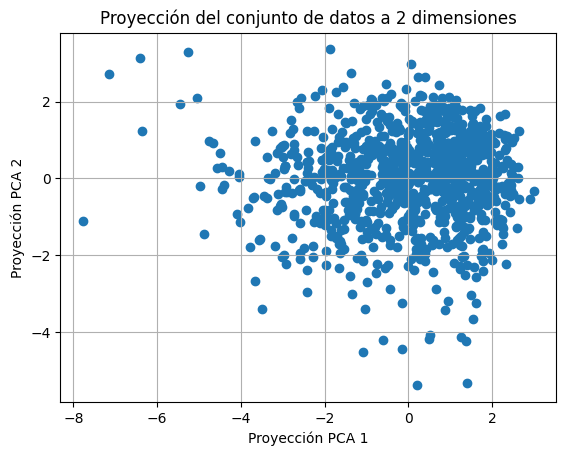

array([0.18029359, 0.09803751])

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds_filtred)

#print(np.std(ds_scaled, axis=0))

pca = PCA(n_components=2)
X_pca = pca.fit_transform(ds_scaled)
# graficamos los datos
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.grid(True)
plt.xlabel('Proyección PCA 1')
plt.ylabel('Proyección PCA 2')
plt.title('Proyección del conjunto de datos a 2 dimensiones')
# %matplotlib inline
plt.show()


pca.explained_variance_ratio_

Como la varianza explicada usando PCA nos dio tan baja con dos dimensiones, podemos pensar que o no tienen relaciones lineales o los datos estan muy dispersos.

Before t-SNE: (980, 15)
After t-SNE: (980, 2)


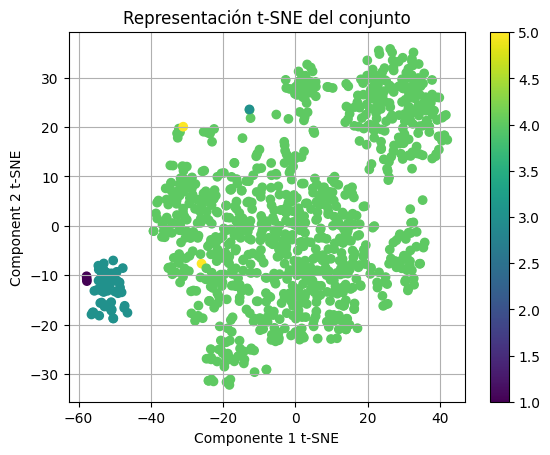

In [32]:

from sklearn.manifold import TSNE


ds_tsne = TSNE(n_components=2, random_state=10).fit_transform(ds_scaled)  

print('Before t-SNE: {}'.format(ds_scaled.shape))
print('After t-SNE: {}'.format(ds_tsne.shape))


plt.scatter(ds_tsne[:,0], ds_tsne[:,1], c=ds_copy["Time_Signature"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 t-SNE')
plt.ylabel('Component 2 t-SNE')
plt.title('Representación t-SNE del conjunto')
plt.colorbar()
plt.show()

mirarlo con mas ganas dado q literalmente cuadno hicimos esto somos tone y dimu nada mas en el aula xd

Antes de UMAP: (980, 15)
Después de UMAP: (980, 2)


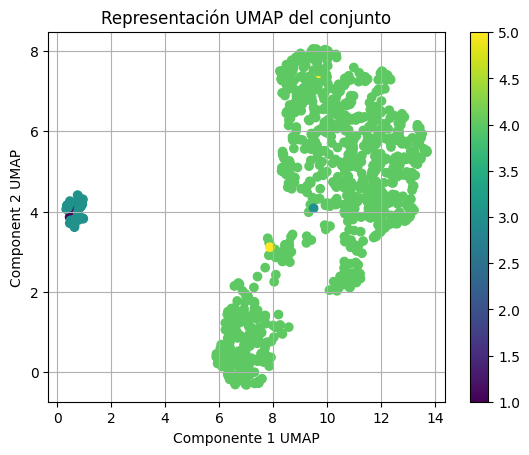

In [31]:
# importamos umap
import umap

ds_umap = umap.UMAP(n_components=2).fit_transform(ds_scaled)

print('Antes de UMAP: {}'.format(ds_scaled.shape))
print('Después de UMAP: {}'.format(ds_umap.shape))

# graficamos los datos, el color de cada punto representa el valor de la casa
plt.scatter(ds_umap[:,0], ds_umap[:,1], c=ds_copy["Time_Signature"], cmap='viridis')
plt.grid(True)
plt.xlabel('Componente 1 UMAP')
plt.ylabel('Component 2 UMAP')
plt.title('Representación UMAP del conjunto')
plt.colorbar()
plt.show()